In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 57)
pd.set_option('display.max_column', 57)

In [3]:
#read the data
data = pd.read_csv('cleaned_data.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = data.copy()

In [5]:
df.head()

,Unnamed: 0,Bathroom,Bathrooms,Bedroom,Bedrooms,Bedrooms:,Coverage,Description,Dining Room,Dining Rooms,Domestic Rooms,Entrance Hall,Erf Size,Facing,Family/TV Room,Floor Size,Garage,Garden,Gardens,Kitchen,Kitchens,Levies,Lifestyle,Listing Date,Listing Number,Lounge,Lounges,Nearby Public Transport,No Transfer Duty,Office,Other,Outbuilding,Parking,Parking.1,Pets Allowed,Pool,Pool.1,Price per m²,Rates and Taxes,Reception Rooms,Roof,Rooms,Security,Special Features,Standalone Building,Street Address,Style,Temperature Control,Type of Property,Wall,Window,city,description,link,price,province,suburbaine
0,0,NaN,2.0,NaN,3.0,NaN,NaN,NaN,"Tiled Floors, Open Plan",NaN,NaN,NaN,NaN,NaN,"Patio, Tiled Floors, Open Plan",133 m²,"Roll up, Single",NaN,1.0,"Stove (Oven & Hob), Extractor Fan, Washing Mac...",NaN,R 1 800,NaN,29 July 2021,110247762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,NaN,NaN,NaN,R 600,NaN,NaN,NaN,NaN,NaN,NaN,"1061 Theunis Street, Weltevreden Park",NaN,NaN,Townhouse,NaN,NaN,roodepoort,NaN,https://www.property24.com/for-sale/weltevrede...,R 1 395 000,gauteng,weltevreden-park
1,1,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,127 m²,NaN,Yes,NaN,NaN,1.0,R 4 055,NaN,28 July 2021,110243035.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,No,NaN,NaN,R 38 976,R 3 294,NaN,NaN,NaN,NaN,NaN,NaN,"18 Heleza Blvd, Sibaya Precinct",NaN,NaN,Apartment / Flat,NaN,NaN,umhlanga,NaN,https://www.property24.com/for-sale/sibaya-pre...,R 4 950 000,kwazulu-natal,sibaya-precinct
2,2,NaN,1.5,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71 m²,NaN,NaN,NaN,NaN,1.0,R 4 500,NaN,02 August 2021,110257762.0,NaN,1.0,"Bus, Train, Minibus Taxi",NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,R 70 408,R 2 500,NaN,NaN,NaN,1,NaN,NaN,"The Leonardo\r\n77 Maude Street, Sandton Central",NaN,NaN,Apartment / Flat,NaN,NaN,sandton,NaN,https://www.property24.com/for-sale/sandton-ce...,R 4 999 000,gauteng,sandton-central
3,3,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400 m²,NaN,NaN,140 m²,2,NaN,NaN,NaN,NaN,R 1 050,NaN,29 July 2021,110245337.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,R 585,NaN,NaN,NaN,NaN,NaN,NaN,"3 Seaview Forest walk estate , Sir Lowrys Pass",NaN,NaN,House,NaN,NaN,somerset-west,NaN,https://www.property24.com/for-sale/sir-lowrys...,R 1 650 000,western-cape,sir-lowrys-pass
4,4,NaN,2.0,NaN,3.0,NaN,NaN,Second floor and above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84 m²,NaN,NaN,NaN,"Refurbished, Tiled floors",NaN,R 1 878,"Coastal/Beach, Holiday Home",28 July 2021,110244016.0,Refurbished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paved,No,NaN,NaN,R 15 417,R 448,NaN,NaN,NaN,NaN,NaN,NaN,"18 SS Ocean View, 15A De Reyger, Jeffreys Bay...",NaN,NaN,Apartment / Flat,NaN,NaN,jeffreys-bay,NaN,https://www.property24.com/for-sale/jeffreys-b...,R 1 295 000,eastern-cape,jeffreys-bay-central


# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **élimination des colonnes inutiles** : Unnamed: 0, link, la variable à valeur manquante à 0.999%
- **variable target** : price
- **lignes et colonnes** : 31125, 57
- **types de variables** : qualitatives : 45, quantitatives : 12
- **Analyse des valeurs manquantes** :
    - Parking : presque vide -> à éliminer
    
#### Analyse de Fond :
- **Visualisation de la target** :
    - suivre une distribution asymétrique positive
    
    
    
- **Signification des variables** :
    -  variables continues normale, asymétriques, office( booleean)
 
    - variable qualitative :
        - variables coordonnees : Street Address,city, province, suburbaine

        - variable cout : 'Levies','Price per m²','Rates and Taxes' 
        - variable security : Coverage , Security, wall
        - variable d'elevation Animaux acceptés : Pets Allowed (oui ou non)
        - variable d'autonomie: Standalone Building, Outbuilding
        
        


### Analyse de la forme

In [6]:
df.shape

(31125, 57)

In [7]:
df.dtypes.value_counts()

object     45
float64    11
int64       1
dtype: int64

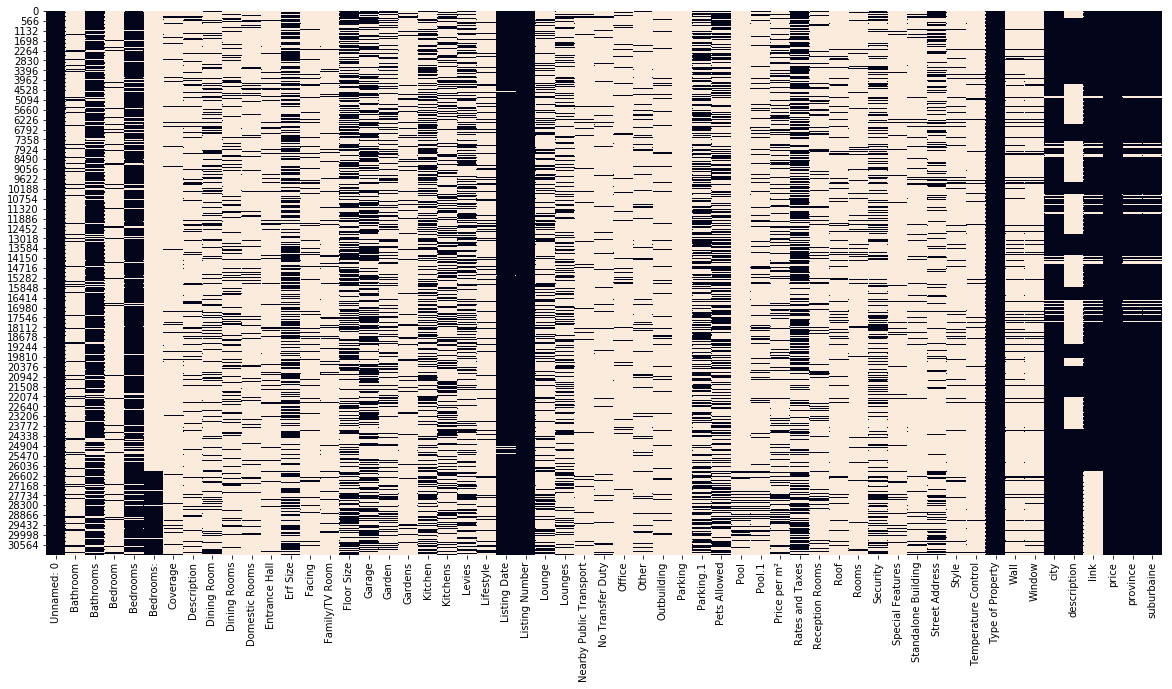

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [9]:
(df.isna().sum(axis=0)/df.shape[0]).sort_values(ascending=True)

Unnamed: 0                 0.000000
Type of Property           0.000000
Listing Number             0.000000
price                      0.000096
Listing Date               0.006779
city                       0.053944
province                   0.053944
suburbaine                 0.053944
Bedrooms                   0.115663
Bathrooms                  0.151422
link                       0.207550
Rates and Taxes            0.421590
description                0.448932
Erf Size                   0.456289
Floor Size                 0.472129
Parking.1                  0.517526
Pets Allowed               0.524145
Garage                     0.529317
Levies                     0.567165
Kitchen                    0.571855
Kitchens                   0.633446
Lounges                    0.688321
Security                   0.695486
Lounge                     0.728643
Garden                     0.729478
Price per m²               0.745863
Dining Rooms               0.783743
Dining Room                0

## Analyse du Fond
### 1. Visulation initiale - Elimination des colonnes inutiles

In [10]:
df = df.drop(['Unnamed: 0','link'],axis=1)

In [11]:
df = df.drop('Parking',axis=1)

In [12]:
df.shape

(31125, 54)

### Examen de la colonne target

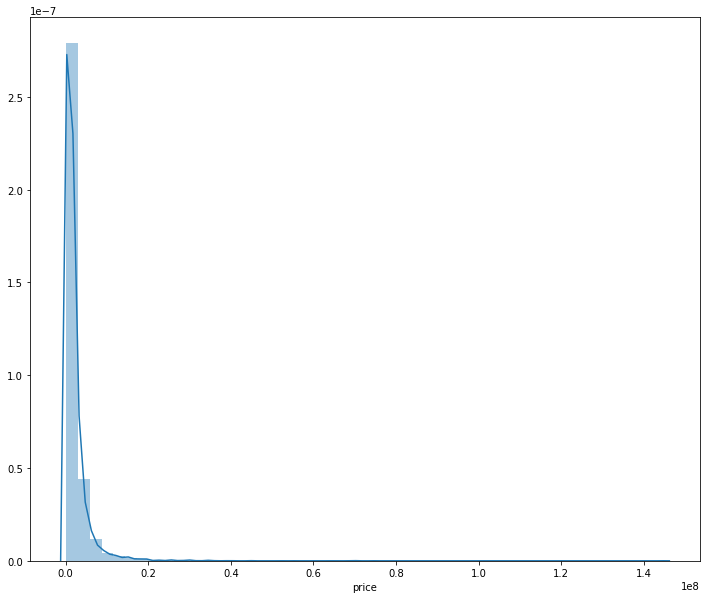

In [93]:
def to_float(string_value):

    string_value = str(string_value)
    string_value = string_value.replace("R","")
    string_value = string_value.replace(" ","")
    return float(string_value)

df = df[df['price'] != "POA"]

plt.figure(figsize=(12,10))
sns.distplot(df['price'].map(to_float))

### histogrames des variables continues 

/usr/local/lib/python3.5/dist-packages/seaborn/distributions.py:290: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


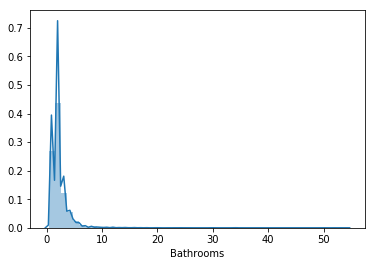

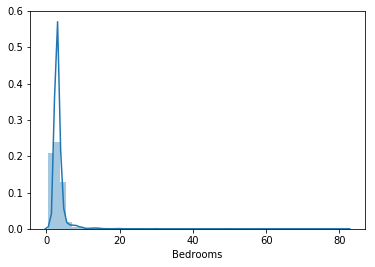

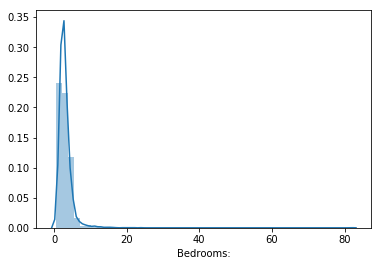

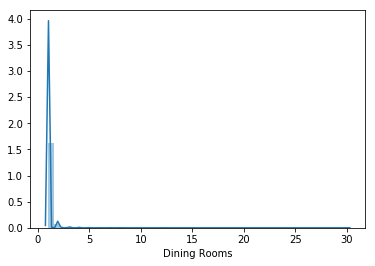

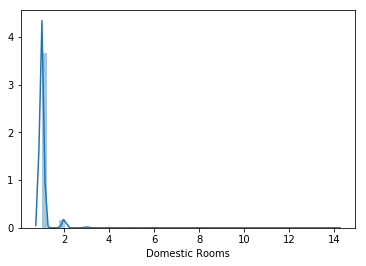

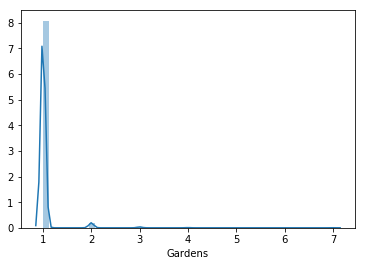

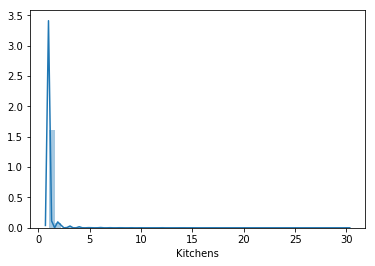

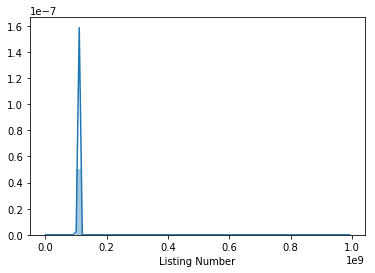

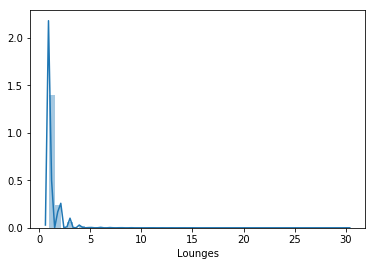

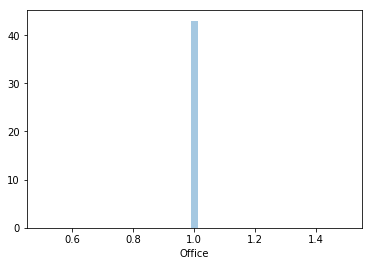

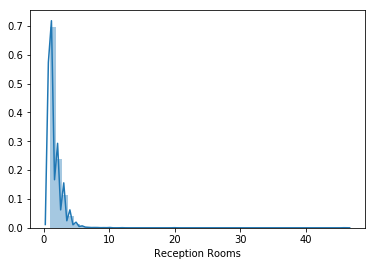

In [56]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

### Variables Qualitatives
#### . Coordonnées

In [100]:
particulars_colums = ['city','province','suburbaine']

In [102]:
for col in particulars_colums:
    print(col,'-------',df[col].unique())

city ------- ['roodepoort' 'umhlanga' 'sandton' 'somerset-west' 'jeffreys-bay'
 'cape-town' 'paarl' 'grahamstown' 'soshanguve' 'pretoria' 'blouberg'
 'kraaifontein' 'stellenbosch' 'bloemfontein' 'polokwane' 'edenvale'
 'vereeniging' 'durban' 'white-river' 'hartbeespoort' 'pietermaritzburg'
 'hillcrest' 'simons-town' 'noordhoek' 'johannesburg' 'germiston'
 'alberton' 'kempton-park' 'pringle-bay' 'midrand' 'gordons-bay'
 'randburg' 'eersterivier' 'modimolle' 'brackenfell' 'port-elizabeth'
 'mossel-bay' 'milnerton' 'durbanville' 'pinetown' 'witbank' 'port-alfred'
 'ballito' 'knysna' 'krugersdorp' 'hout-bay' 'benoni' 'bredasdorp'
 'plettenberg-bay' 'wellington' 'melkbosstrand' 'east-london'
 'bronkhorstspruit' 'st-francis-bay' 'elands-bay' 'centurion'
 'kuils-river' 'akasia' 'bellville' 'boksburg' 'bedfordview' 'randfontein'
 'potchefstroom' 'george' 'stilbaai' 'parow' 'bettys-bay' 'nelspruit'
 'tembisa' 'westville' 'fish-hoek' 'uitenhage' 'san-lameer' 'langebaan'
 'hoedspruit' 'montagu' '

#### .Variables coûts

In [104]:
cost_columns =['Levies','Price per m²','Rates and Taxes']

#### .Variables securité

In [107]:
safe_columns = ['Coverage' , 'Security', 'Wall']

In [111]:
for col in safe_columns:
    print(col,':',df[col].value_counts())

Coverage : 100 %    127
25 %     107
26 %      59
28 %      57
24 %      45
1 %       42
22 %      39
23 %      39
20 %      38
18 %      36
16 %      36
32 %      34
27 %      33
15 %      33
36 %      32
35 %      31
29 %      30
38 %      29
19 %      29
30 %      29
21 %      28
37 %      27
50 %      26
45 %      25
31 %      25
34 %      25
43 %      25
33 %      25
        ... 
64 %       7
81 %       7
97 %       7
72 %       6
62 %       5
79 %       5
85 %       5
86 %       5
71 %       5
77 %       5
84 %       5
92 %       5
99 %       4
78 %       4
82 %       4
83 %       3
75 %       3
88 %       3
76 %       3
95 %       3
87 %       2
94 %       2
74 %       2
90 %       2
93 %       2
91 %       1
96 %       1
98 %       1
Name: Coverage, Length: 99, dtype: int64
Security : 1                                                                                                                                                                                                   

#### .Variable d'autonomie

In [112]:
autonome_columns = ['Standalone Building', 'Outbuilding']

In [113]:
for col in automome_columns:
    print(col,':',df[col].value_counts())

Standalone Building : Yes    1569
No      663
Name: Standalone Building, dtype: int64
Outbuilding : Staff Quarters/Domestic Rooms                                                                                                                      236
1                                                                                                                                                  185
Flatlet                                                                                                                                            137
Outbuilding                                                                                                                                        137
Storeroom                                                                                                                                          130
Outside Toilets                                                                                                                                  

In [117]:
df['Facing'].value_counts()

North                                             721
Sea                                               346
Level Road                                        181
East                                              126
Street Front                                      117
Mountain View                                     113
South                                              90
Above Road                                         86
West                                               67
East, Sea                                          64
North, South, Above Road                           44
North, Level Road                                  39
Sea, Mountain View                                 37
Below Road                                         35
Street Front, Level Road                           33
North, Above Road                                  32
North, Mountain View                               25
North, East                                        23
North, Street Front         